<a href="https://colab.research.google.com/github/j-a-yang/machine-learning/blob/master/hw1/Playing_with_learning_rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring different learning rates in gradient descent

Using functions from $R^2 to R$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

## Gradient Descent

In [0]:
class GradientDescent():
  
  def __init__(self, f, f_partial_x, f_partial_y, lr, x_init, y_init, a_init, b_init, c_init, d_init):
    self.f = f
    self.f_partial_x = f_partial_x
    self.f_partial_y = f_partial_y
    self.xs = [x_init]
    self.ys = [y_init]
    self.zs = [f(x_init, y_init)]
    self.a = a_init
    self.b = b_init
    self.c = c_init
    self.d = d_init
    self.lr = lr
  
  def step(self, num_steps=1):
    for _ in range(num_steps):
      x = self.xs[-1]
      y = self.ys[-1]
  
      # one step of gradient descent
      x = x - self.lr * self.f_partial_x(x)
      y = y - self.lr * self.f_partial_y(y)
    
      # update
      self.xs.append(x)
      self.ys.append(y)
      self.zs.append(self.f(x, y))
      self.a = min(self.xs[-1], self.a)
      self.b = max(self.xs[-1], self.b)
      self.c = min(self.ys[-1], self.c)
      self.d = max(self.ys[-1], self.d)
    
  def plot(self):

    x_axis = np.linspace(self.a, self.b)
    y_axis = np.linspace(self.c, self.d)

    X, Y = np.meshgrid(x_axis, y_axis)
    Z = f(X, Y)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Plotting the graph using 3D contour plot and changing the viewing angle.
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.view_init(50, 70)
    
    # plot all points encountered during gradient descent
    ax.scatter(self.xs, self.ys, self.zs, 'o')

In [0]:
def f(x, y):
    return (2.0 * (x - 2.0)**2) + y**2

def f_partial_x(x):
    return 4.0 * (x - 2.0)

def f_partial_y(y):
    return 2.0 * y

With this function, learning rate of 0.5 or higher diverges, 0.4 seems to work well and quickly.

In [0]:
GD = GradientDescent(f, f_partial_x, f_partial_y, lr=0.4, x_init=-10.0, y_init=10.0, a_init=-10.0, b_init=10.0, c_init=-10.0, d_init=10.0)

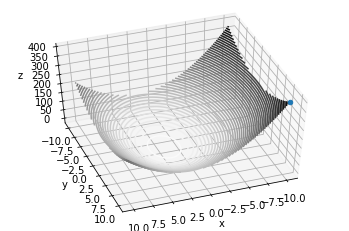

In [0]:
GD.plot()

In [0]:
GD.step(6)

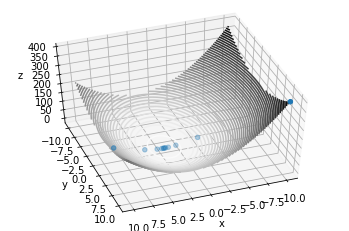

In [0]:
GD.plot()